## 50 startups

### Predict which companies to invest for maximizing profit

### Part Introduction

#### Overview
The dataset about 50 startups. It has 7 columns:

Metadata:

    -----ID - startup ID (Schould create)
    R&D - Spend how much each startup spends on Research and Development
    Administration - how much they send on Administration cost
    Marketing - Spend how much they spend on Marketing
    State - which state the startup is based in
    Profit -  the profit made by the startup, $
    
#### Questions:

Choose model with the best score, create predictions, choose companirs to invest for maximizing profit.

### Part 1: Import, Load Data

 Import libraries, read data file

In [77]:
#import standard libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

#import model and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
#load data
#read data from '.csv' files
train = pd.read_csv("train_50Startups.csv")
#test = pd.read_csv("test_50Startups.csv")

#identify target
target = train['Profit']

### Part 2: Exploratory Data Analysis

Info, head; 
Describe + visualisation(displot);
List of Numerical and Categorical features;
Missing Data (list of data features, filling missing values;
Visualisation of Numerical and Categorical features (replot + barplot)

In [79]:
#print the full summary of the train dataset
train.columns
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(50, 5)

In [80]:
#print the full summary of the testset

In [81]:
#preview of the first 5 lines of the loaded train data
train.head()

#preview of the first lines of the loaded test data
#test.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [82]:
#observation of trainset(discribe)
train.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


You look the mean value and the median value (50%), 75% value and max value. there are not having much difference, expect Marketing Spend column. 

In [83]:
#observation of target variable(understanding)
train['Profit'].describe()
train['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [84]:
#check the train duplicated
train[train.duplicated()]
#check of target variable duplicates
train['Profit'].value_counts()

89949.14     1
156122.51    1
107404.34    1
124266.90    1
71498.49     1
144259.40    1
126992.93    1
65200.33     1
49490.75     1
156991.12    1
125370.37    1
105008.31    1
149759.96    1
146121.95    1
77798.83     1
101004.64    1
118474.03    1
81229.06     1
182901.99    1
103282.38    1
141585.52    1
96778.92     1
129917.04    1
191050.39    1
110352.25    1
78239.91     1
35673.41     1
64926.08     1
108733.99    1
192261.83    1
191792.06    1
99937.59     1
152211.77    1
81005.76     1
122776.86    1
155752.60    1
97427.84     1
111313.02    1
96479.51     1
166187.94    1
108552.04    1
96712.80     1
14681.40     1
90708.19     1
134307.35    1
42559.73     1
69758.98     1
105733.54    1
97483.56     1
132602.65    1
Name: Profit, dtype: int64

- You don't have any duplicate values in our dataset. If they would have been you would have to delete it
- You could see that all the observations have 1 count, it means they are unique.

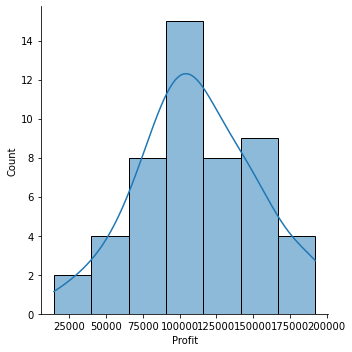

In [85]:
#visualisation of target variable
sn.displot(train['Profit'], kde=True) #or distplot

Dist plot are used to check the distribution of the data and check for skewness in the data

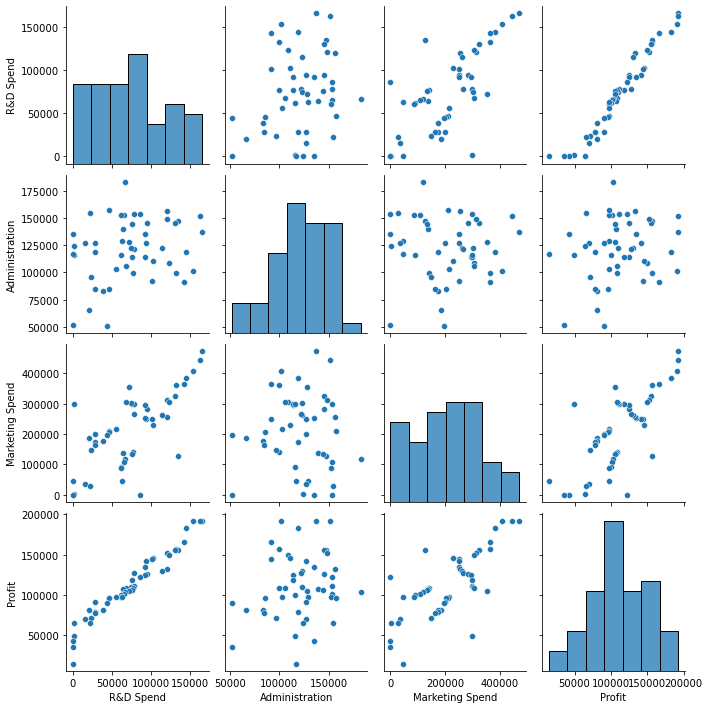

In [86]:
sn.pairplot(train)

There exist a positive correlation between R&D Spend and Marketing Spend as well. You will use headmap and correlation function to determine for features.

In [87]:
#If you have ID, set ID to index in train and teat dataset
#train = train.set_index('ID')

In [88]:
#list of Numerical and Categorical features
#check for Numerical and Categorical features in train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print('Quantity of Numerical features: ', len(numerical_feats_train), train[numerical_feats_train].columns)
print()
print('Quantity of Categorical features: ', len(categorical_feats_train), train[categorical_feats_train].columns)
print()



Quantity of Numerical features:  4 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of Categorical features:  1 Index(['State'], dtype='object')



In [89]:
#missing values train and test
#check the train features with missing values
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
train.isnull().sum()
print("There are " + str(len(nan_columns)) + " with NAN values")
nan_columns

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
There are 0 with NAN values


[]

In [90]:
#check the tarin features with values = 0
train.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Filling missing values (fields where NAN values have meaning)

Explaining in further depth:

    - 'Category': categorical - replacement of NAN by 'None'
    - 'R&D Spend': numerical - replacement of NAN by 'mean or 0' 
    - 'Marketing Spend': numerical - replacement of NAN by 'mean or 0'
    (I have only values = 0)


In [91]:
#Numerical NAN columns to fill in train and test dataset
##nan_columns_fill = [
##    'R&D Spend', 
##    'Marketing Spend'
##    ]

#replace 'NAN' with 'mean or 0' in these columns
##train.fillna(train.mean(), inplace = True)
##test.fillna(test.mean(), inplace=True)

# categorical NAN columns to fill in train and test datasets
##na_columns_fill = [
##        'Category'
##        ]

# replace 'NAN' with 'None' in these columns
##for col in an_columns_fill:
##    train[col].fillna('None', inplace=True)
##    test[col].fillna('None', inplace=True)

#check is there any mising value left in train and test
##train.isnull().sum().sum()
##test.isnull().sum().sum()

/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

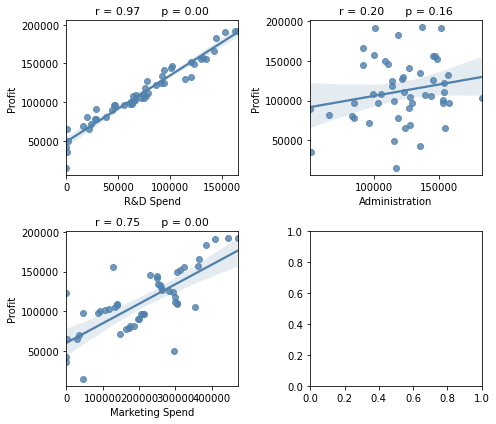

In [92]:
# Visualisation of Numerical features (regplot)
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['ID', 'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sn.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

<AxesSubplot:xlabel='State', ylabel='Profit'>

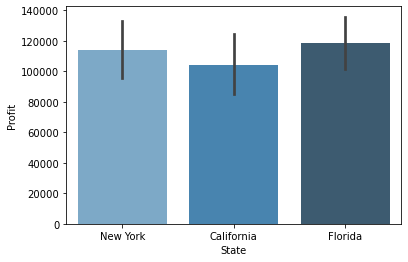

In [93]:
#profit split in State level
sn.barplot(x = 'State', y = 'Profit', data = train, palette = 'Blues_d')

Heatmap is very effective technique to check the missing values in the dataset.

odervations: I don't have any missing values in dataset

<AxesSubplot:>

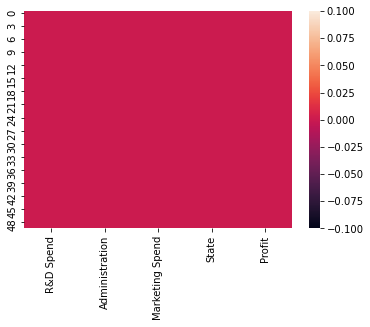

In [94]:
sn.heatmap(train.isnull())

In [95]:
#diffetent metode check missing values
train.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Part 3: Data Wrangling and Transformation

One Hot Encoding,Standard Scaler(optional), Creating dataset for ML part, Train\Test splitting method 


#### Correlation

The matrix is an important data analysis metric that is computed to summarize data to understand correlation(relationship) between various variables.

Correlation only works on the continuous variables, we need to convert the State variable into numerical calues

In [96]:
train['State'].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

In [97]:
# One Hot Encoding technique. we have onle 3 unique states. If we have more we would have used Label Encoding
train = pd.get_dummies(train, columns = ['State'])
train.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [98]:
#check columns 
train.shape

(50, 7)

<AxesSubplot:>

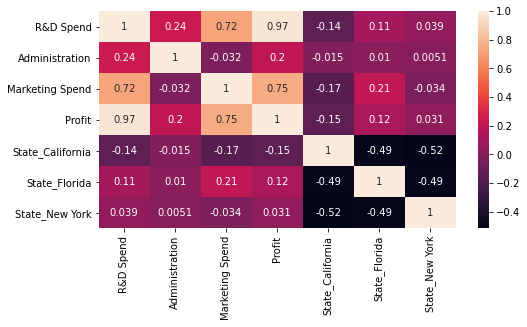

In [99]:
#add columns for State
plt.figure(figsize=(8,4))
sn.heatmap(train.corr(),annot = True)

In [100]:
#finding correlation
train.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


##### Observation:
There exist a positive correlation between R&D Spend and Marketing Spend with value 0.7 and very high posotive correlation with a value of 0.973 between Profit and R&D Spend

The correlation value for Administration and R&D Spend is 0.24 so is it very low correlation and between Administration and Marketing Spend is -0.03 so we can say there is negative correlation


Control missing values in test data set and drop unnecessary variables

In [101]:
train.rename(columns={'Marketing Spend':'Marketing_Spend'}, inplace = True)
train.rename(columns={'R&D Spend':'RD_Spend'}, inplace=True)
train.rename(columns={'State_New York':'State_New_York'}, inplace=True)
train.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [105]:
#Standard Scaler train and test
sc = StandardScaler()
train_sc = sc.fit_transform(train)
train_sc = pd.DataFrame(train_sc, columns = train.columns)
train_sc.head()

#from sklearn.preprocessing import StandartScaler
#sc = StandartScaler()
#test_sc = sc.fit_transform(test)
#test_sc = pd.DataFrame(test_sc)

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [120]:
## creating datasets for ML part
## set X for features of scaled train dataset 'train_sc'
X = train_sc

##set y for the target 'Profit'. Befor made tain=train.drop(columns=['Profit'])
y = target

##X_Test for features of scaler tesr dataset 'test_sc', base set
#X_Test = test

In [154]:
#'train\test' split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(40, 7)

In [155]:
X_test.shape

(10, 7)

### Part 4: Machine Learning

ML models(linear regression, gradient boosting regression), build, train, evaluate and visualiuse models, creating final predictions with test set, model comparison.

In [156]:
#Linear regression model
LR = LinearRegression()

#Model Training
LR.fit(X_train, y_train)

#Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [168]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [172]:
#Model R2 score
LRscore = LR.score(X_test, y_test)

In [158]:
#Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                         'r2score': r2_score(y_test, LR_pred),
                         'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                         'MSE': metrics.mean_squared_error(y_test,LR_pred),
                         'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                         'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                         'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,1.0,2.619345e-11,1.143494e-21,3.381560e-11,6.310887e-31,7.944109e-16


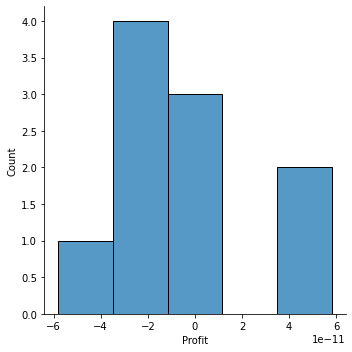

In [174]:
sn.displot(LR_pred - y_test)

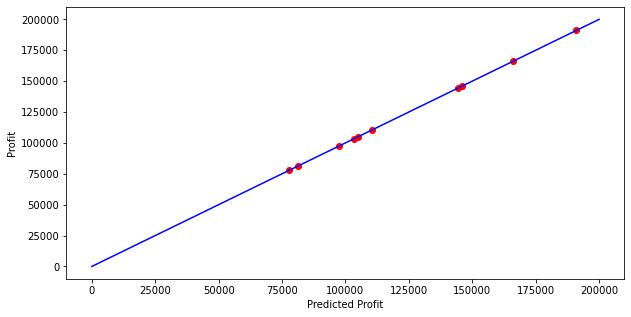

In [159]:
#Visualisation  of Train dataset predictions
#plot outputs
plt.figure(figsize=(10,5))
pl.plot(y_test, LR_pred, 'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [160]:
#Gradient Boosting Regressor model
GB = GradientBoostingRegressor(random_state=0)

#Model Training
GB.fit(X_train, y_train)

#Model Prediction
GB_pred = GB.predict(X_test)

#Model R2 score
GBscrore = GB.score(X_test, y_test)

In [161]:

# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.994493,2076.263583,7.043014e+06,2653.867759,0.00062,0.024898


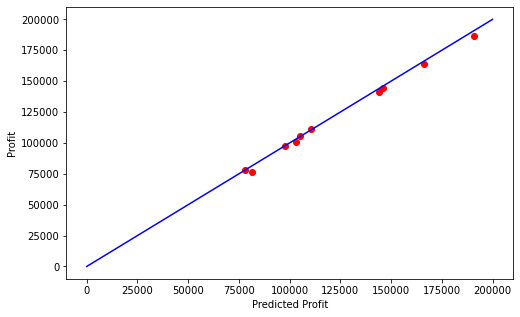

In [162]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, GB_pred,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [164]:
#Model comparison
#score comparison of models
frames = [LRMertics, GBMetrics]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,1.000000,3.917823e-11,1.808090e-21,4.252164e-11,7.281793e-31,8.533342e-16
2,Gradient Boosting Regressor,0.994493,2.076264e+03,7.043014e+06,2.653868e+03,6.198917e-04,2.489762e-02


In [167]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y_test,"LR Predicted Profit":LR_pred, "GB Predicted Profit":GB_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
28,103282.380000,103282.380000,101004.861567
11,144259.400000,144259.400000,141584.531824
10,146121.950000,146121.950000,144443.374291
41,77798.830000,77798.830000,78240.882542
2,191050.390000,191050.390000,186309.136256
27,105008.310000,105008.310000,105733.921037
38,81229.060000,81229.060000,76089.844840
31,97483.560000,97483.560000,97428.067844
22,110352.250000,110352.250000,111134.853319
4,166187.940000,166187.940000,163942.494441


##### Result The best model is ... with R2 score = ...

### Conclusion

Submission of file with prediction

In [165]:
#submission
#sub = pd.DataFrame()
#sub['ID'] = test.index
#sub['Profit'] = GB_pred1
#sub.to_csv('StartupPredictions.csv', index=False)